In [61]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.float_format', lambda x: '%.5f' % x)
import warnings
warnings.simplefilter(action="ignore")
import datetime as dt

In [65]:
data = pd.read_excel("UK.xlsx")

In [66]:
data.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Revenue,Day of Week
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95000,13085,United Kingdom,83.40000,Tuesday
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75000,13085,United Kingdom,81.00000,Tuesday
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75000,13085,United Kingdom,81.00000,Tuesday
3,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25000,13085,United Kingdom,30.00000,Tuesday
4,489434,22064,PINK DOUGHNUT TRINKET POT,24,2009-12-01 07:45:00,1.65000,13085,United Kingdom,39.60000,Tuesday


### EXPLORATORY DATA ANALYSIS

In [67]:
data.isnull().sum()

Invoice        0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
Price          0
Customer ID    0
Country        0
Revenue        0
Day of Week    0
dtype: int64

In [68]:
data.columns

Index(['Invoice', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'Price', 'Customer ID', 'Country', 'Revenue', 'Day of Week'],
      dtype='object')

In [69]:
data.StockCode.value_counts().head()

85123A    4044
85099B    2507
20725     2203
84879     2147
21034     2125
Name: StockCode, dtype: int64

In [70]:
data.Description.value_counts().head()

WHITE HANGING HEART T-LIGHT HOLDER    4038
ASSORTED COLOUR BIRD ORNAMENT         2147
REX CASH+CARRY JUMBO SHOPPER          2125
JUMBO BAG RED RETROSPOT               2014
LUNCH BAG  BLACK SKULL.               1917
Name: Description, dtype: int64

In [71]:
data["Customer ID"].value_counts().head()

17841    12057
12748     6636
14606     6025
14096     4415
15311     3585
Name: Customer ID, dtype: int64

In [72]:
data["Day of Week"].value_counts().head(7)

Thursday     123588
Sunday       116173
Tuesday      104434
Wednesday    103966
Monday        99014
Friday        77998
Saturday        313
Name: Day of Week, dtype: int64

In [73]:
data.Description.nunique()

4811

In [74]:
data["Customer ID"].nunique()

5172

In [77]:
data.groupby("Description").agg({"Quantity": "sum"}).sort_values("Quantity", ascending=False).head()

,Quantity
Description,
WHITE HANGING HEART T-LIGHT HOLDER,26820
ASSORTED COLOUR BIRD ORNAMENT,25735
60 TEATIME FAIRY CAKE CASES,20754
PACK OF 60 PINK PAISLEY CAKE CASES,17625
JUMBO BAG RED RETROSPOT,17515


In [78]:
data.describe([0.01, 0.05, 0.10, 0.25, 0.50, 0.75, 0.90, 0.95, 0.99]).T

,count,mean,std,min,1%,5%,10%,25%,50%,75%,90%,95%,99%,max
Invoice,625486.00000,537231.38880,26843.71705,489434.00000,490281.00000,494648.00000,499890.00000,514514.00000,536638.00000,561705.00000,574250.00000,577742.00000,580727.00000,581586.00000
Quantity,625486.00000,6.94777,6.59744,1.00000,1.00000,1.00000,1.00000,2.00000,4.00000,12.00000,16.00000,24.00000,25.00000,27.00000
Price,625486.00000,2.27580,1.61047,0.00000,0.29000,0.42000,0.55000,1.25000,1.69000,2.95000,4.95000,5.95000,6.95000,7.50000
Customer ID,625486.00000,15572.88953,1592.48627,12346.00000,12748.00000,13059.00000,13291.00000,14235.00000,15572.00000,16945.00000,17787.00000,17931.00000,18219.00000,18287.00000
Revenue,625486.00000,12.25018,13.07521,0.00000,0.55000,1.25000,1.65000,3.75000,9.36000,16.50000,25.00000,34.65000,67.50000,182.25000


### RFM METRICS

In [79]:
data.InvoiceDate.max()

Timestamp('2011-12-09 12:49:00')

In [80]:
today_date = dt.datetime(2011,12,31)

In [81]:
data["Tenure"] = data["InvoiceDate"]

In [84]:
RFM = data.groupby("Customer ID").agg({"InvoiceDate" : lambda date : (today_date - date.max()).days,
                                 "Tenure" : lambda date : (today_date - date.min()).days,
                                 "Invoice" : lambda num : len(num),
                                 "Revenue" : lambda revenue : revenue.sum()})

In [85]:
RFM.columns = ["Recency", "Tenure", "Frequency", "Monetary"]

In [87]:
RFM.head()

,Recency,Tenure,Frequency,Monetary
Customer ID,,,,
12346,550,746,33,372.86000
12608,425,425,12,159.95000
12745,507,595,15,417.93000
12746,561,561,16,238.65000
12747,23,753,209,6062.59000


In [90]:
RFM["RecencyScore"] = pd.qcut(RFM["Recency"], 5, labels = [5,4,3,2,1])
RFM["FrequencyScore"] = pd.qcut(RFM["Frequency"], 5, labels = [1,2,3,4,5])
RFM["MonetaryScore"] = pd.qcut(RFM["Monetary"], 5, labels = [1,2,3,4,5])
RFM["TenureScore"] = pd.qcut(RFM['Tenure'], 5, labels=[1, 2, 3, 4, 5])

In [91]:
RFM.head()

,Recency,Tenure,Frequency,Monetary,RecencyScore,FrequencyScore,MonetaryScore,TenureScore
Customer ID,,,,,,,,
12346,550,746,33,372.86000,1,3,2,5
12608,425,425,12,159.95000,2,1,1,2
12745,507,595,15,417.93000,1,2,2,3
12746,561,561,16,238.65000,1,2,2,3
12747,23,753,209,6062.59000,5,5,5,5


In [93]:
pd.crosstab(RFM["Frequency"],RFM["FrequencyScore"])

FrequencyScore,1,2,3,4,5
Frequency,,,,,
1,76,0,0,0,0
2,59,0,0,0,0
3,63,0,0,0,0
4,67,0,0,0,0
5,90,0,0,0,0
6,86,0,0,0,0
7,71,0,0,0,0
8,82,0,0,0,0
9,75,0,0,0,0


In [95]:
RFM["RF_Score"] = RFM["RecencyScore"].astype(str) + RFM["FrequencyScore"].astype(str)

In [96]:
RFM.head()

,Recency,Tenure,Frequency,Monetary,RecencyScore,FrequencyScore,MonetaryScore,TenureScore,RF_Score
Customer ID,,,,,,,,,
12346,550,746,33,372.86000,1,3,2,5,13
12608,425,425,12,159.95000,2,1,1,2,21
12745,507,595,15,417.93000,1,2,2,3,12
12746,561,561,16,238.65000,1,2,2,3,12
12747,23,753,209,6062.59000,5,5,5,5,55


In [99]:
# REGEX NAMED
seg_map = {
    r'[1-2][1-2]': 'Hibernating',
    r'[1-2][3-4]': 'At_Risk',
    r'[1-2]5': 'Cant_Loose',
    r'3[1-2]': 'About_to_Sleep',
    r'33': 'Need_Attention',
    r'[3-4][4-5]': 'Loyal_Customers',
    r'41': 'Promising',
    r'51': 'New_Customers',
    r'[4-5][2-3]': 'Potential_Loyalists',
    r'5[4-5]': 'Champions'
}


In [100]:
RFM["Segment"] = RFM["RF_Score"].replace(seg_map, regex = True)

In [101]:
RFM.head()

,Recency,Tenure,Frequency,Monetary,RecencyScore,FrequencyScore,MonetaryScore,TenureScore,RF_Score,Segment
Customer ID,,,,,,,,,,
12346,550,746,33,372.86000,1,3,2,5,13,At_Risk
12608,425,425,12,159.95000,2,1,1,2,21,Hibernating
12745,507,595,15,417.93000,1,2,2,3,12,Hibernating
12746,561,561,16,238.65000,1,2,2,3,12,Hibernating
12747,23,753,209,6062.59000,5,5,5,5,55,Champions


In [107]:
RFM.reset_index(inplace=True)

In [109]:
RFM.groupby("Segment").agg({"Customer ID": "count"})

,Customer ID
Segment,
About_to_Sleep,387
At_Risk,705
Cant_Loose,103
Champions,733
Hibernating,1257
Loyal_Customers,964
Need_Attention,230
New_Customers,71
Potential_Loyalists,601


In [111]:
RFM[["Segment", "Recency", "Frequency", "Monetary"]].groupby("Segment").agg(["mean"])

,Recency,Frequency,Monetary
,mean,mean,mean
Segment,,,
About_to_Sleep,132.98191,16.19121,301.89623
At_Risk,423.20993,65.92340,782.82321
Cant_Loose,372.12621,307.88350,3288.60342
Champions,29.45703,386.89086,4562.77428
Hibernating,474.02307,14.19730,233.94275
Loyal_Customers,87.31120,210.90871,2499.20599
Need_Attention,130.30000,48.09565,774.94539
New_Customers,31.45070,7.74648,180.19127


In [112]:
RFM["Basket_Size"] = RFM["Monetary"] / RFM["Frequency"]

In [113]:
RFM.head()

,Customer ID,Recency,Tenure,Frequency,Monetary,RecencyScore,FrequencyScore,MonetaryScore,TenureScore,RF_Score,Segment,Basket_Size
0,12346,550,746,33,372.86000,1,3,2,5,13,At_Risk,11.29879
1,12608,425,425,12,159.95000,2,1,1,2,21,Hibernating,13.32917
2,12745,507,595,15,417.93000,1,2,2,3,12,Hibernating,27.86200
3,12746,561,561,16,238.65000,1,2,2,3,12,Hibernating,14.91563
4,12747,23,753,209,6062.59000,5,5,5,5,55,Champions,29.00761


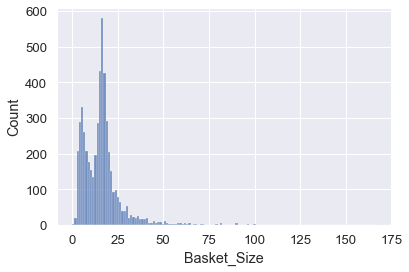

In [118]:
sns.set_theme(font_scale=1.2) # set theme for plots
sns.histplot(x=RFM["Basket_Size"])
plt.show()

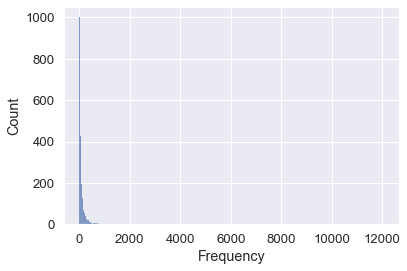

In [119]:
sns.set_theme(font_scale=1.2) # set theme for plots
sns.histplot(x=RFM["Frequency"])
plt.show()

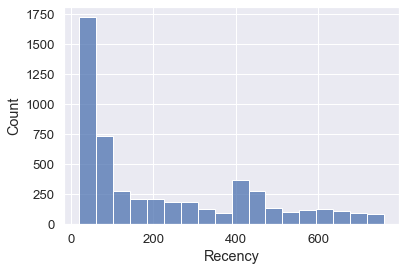

In [124]:
sns.set_theme(font_scale=1.2) # set theme for plots
sns.histplot(x=RFM["Recency"])
plt.show()

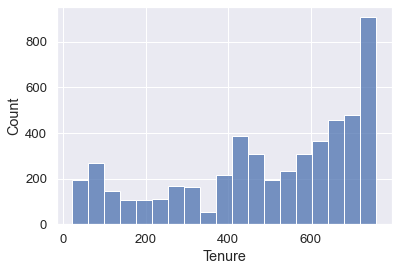

In [125]:
sns.set_theme(font_scale=1.2) # set theme for plots
sns.histplot(x=RFM["Tenure"])
plt.show()

In [123]:
cols = ["Frequency", "Recency", "Monetary"]
for col in cols:
    print(RFM[col].describe().T)
    print("*************************************")

count    5172.00000
mean      120.93697
std       297.84959
min         1.00000
25%        18.00000
50%        47.00000
75%       124.25000
max     12057.00000
Name: Frequency, dtype: float64
*************************************
count   5172.00000
mean     223.75309
std      210.37340
min       21.00000
25%       47.00000
50%      117.00000
75%      402.00000
max      759.00000
Name: Recency, dtype: float64
*************************************
count    5172.00000
mean     1481.50023
std      2957.36162
min         0.00000
25%       243.44000
50%       596.78000
75%      1528.74000
max     68066.21000
Name: Monetary, dtype: float64
*************************************
